In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_data(n=50):
    x = np.random.normal(loc=0, scale=1, size=(n, 5))
    x_inter = np.hstack([x, np.ones((n, 1))])
    beta = np.array([0.5, 1, 1, 1, 1, 1])
    p = 1 / (1 + np.exp(- x_inter @ beta))
    y = np.random.binomial(1, p, size=n)
    return x, y

In [3]:
def experiment(n=50, L=100):
    beta_dif_sum_all = 0
    beta_dif_sum_3 = 0
    beta_true = np.array([1, 1, 1, 1, 1])
    for _ in range(L):
        log_reg_all = LogisticRegression(penalty=None)
        log_reg_3 = LogisticRegression(penalty=None)
        x, y = generate_data(n)
        log_reg_all.fit(x, y)
        log_reg_3.fit(x[:, :3], y)
        beta_dif_sum_all += np.linalg.norm(beta_true - log_reg_all.coef_)**2
        beta_dif_sum_3 += np.linalg.norm(beta_true[:3] - log_reg_3.coef_)**2
    return beta_dif_sum_all / L, beta_dif_sum_3 / L

In [5]:
experiment()[0]

np.float64(4.126561158283446)

In [10]:
ns = [i for i in range(50, 101, 10)] + [i for i in range(100, 1001, 100)]
results = [experiment(n) for n in ns]

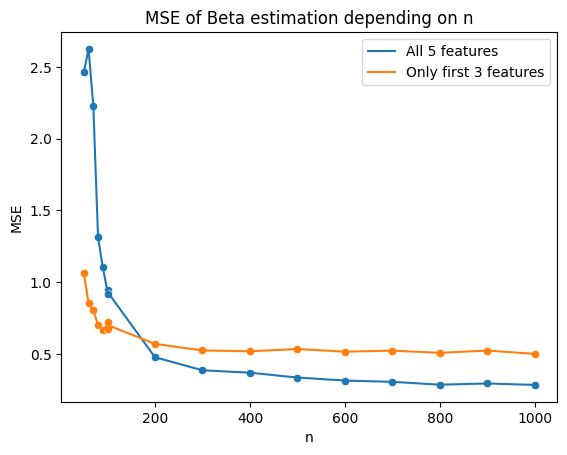

In [11]:
data = pd.DataFrame(results, columns=['MSE_5', 'MSE_3'], index=ns)
data.index.name = 'n'
sns.lineplot(x=data.index, y='MSE_5', data=data, label='All 5 features')
sns.scatterplot(x=data.index, y='MSE_5', data=data)
sns.lineplot(x=data.index, y='MSE_3', data=data, label="Only first 3 features")
sns.scatterplot(x=data.index, y='MSE_3', data=data)
plt.title('MSE of Beta estimation depending on n')
plt.ylabel('MSE')
plt.legend()